# UCI Human Activity Recognition Using Smartphones Data Set

If, like me, you have already attended a machine learning course, you probably already know this dataset.

From their outstandingly descriptive [webpage](http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones):

> **Data Set Information:**
> 
> The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 
> 
> The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.
> 
> **Attribute Information:**
> 
> For each record in the dataset it is provided: 
> - Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
> - Triaxial Angular velocity from the gyroscope. 
> - A 561-feature vector with time and frequency domain variables. 
> - Its activity label. 
> - An identifier of the subject who carried out the experiment.

Well, did you also go dizzy with those transformations applied to the sensor signals? Worry not! I also have no idea what they are talking about, but thing is, it makes no difference in this case, since, **#spoiler alert!#** my model performed very nicely after my decision to disregard that information and work with the features at face value. It seems they were simply necessary transformation to turn the signals into useful information.

One thing I would like to comment though: that 561-feature vector, that is my source of data for machine learning, contains mostly statistical information, like average, curtosis and standard deviation, determined on the single movement measurements. Although it comes as no surprise, I found it quite amusing to realize in practice that something such as a standard deviation is useful to model a behavior!

## My approach

When exploring public datasets, I enjoy to tackle each one of them from a slightly different perspective. For this example, I decided to explore the [Scikit-Learn Supervised learning models](https://scikit-learn.org/stable/supervised_learning.html) one by one, trying to pursuit the best-performing. I used all of those that were proper for classification problems, with their default parameters. Then, I delved into the documentation for the best-performing model, in order to explore and tune its parameters. Felt like learning with no effort!

### Loading dependencies

(Do you also think these three should be automatically loaded by default?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now I will load a file containing the features names, and the training set (both features values and labels).

In [2]:
features_names = pd.read_csv('features.txt', delimiter = '\s+', header = None)
X_train = pd.read_csv('train/X_train.txt', delimiter = '\s+',  header = None)
y_train = pd.read_csv('train/y_train.txt', delimiter = '\s+', header = None)

The columns in the original `X_train` file are not labeled, so let me do it.

In [3]:
X_train.columns = features_names.iloc[:, 1]

Now that mandatory first inspection.

In [4]:
X_train.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Are there empty values?

In [5]:
X_train.isna().sum(axis = 1).sum()

0

No empty values.

All features are supposed to be floats, were they loaded as such?

In [6]:
X_train.dtypes.value_counts()

float64    561
dtype: int64

Yes, we got 561 float features.

Now, from the extensive documentation on this dataset, I know that all values are supposed to be normalized in the range \[-1, 1\]. Is that so? 

{'whiskers': [<matplotlib.lines.Line2D at 0x2684ffb29e8>,
 'caps': [<matplotlib.lines.Line2D at 0x2684ffb2e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2684ffb25f8>],
 'medians': [<matplotlib.lines.Line2D at 0x2684ffc6748>],
 'fliers': [<matplotlib.lines.Line2D at 0x2684ffc6a90>],
 'means': []}

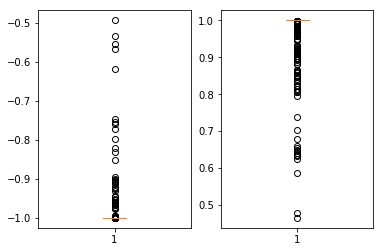

In [7]:
describe = X_train.describe()
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(describe.loc['min'])
ax[1].boxplot(describe.loc['max'])

Alrighty! Most of the minimum values is close to -1, all are between -0.5 and -1 and none is lower than -1. Most of the maximum values is close to 1, all are between circa 0.5 and 1.0 and none is higher than 1.0.

This is one of those rare datasets where no imputation or transformation seems to be necessary. The people making it available made sure it was gold standard.

Now, for my first attempt in fitting a model, and in order to save processing time, I will work with a sample of the original dataset. I am subsampling 500 entries from the 7352 available. I am doing this using random indexes.

In [8]:
np.random.seed(24)
sample = np.random.randint(low = 0, high = len(X_train), size = 500)
sample.sort()

X_train_sample = X_train.iloc[sample, :]
y_train_sample = y_train.iloc[sample, :]

Now I am loading some dependencies I am sure will be needed any time. Other dependencies will be loaded as needed.

In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Let me start fitting some models. 

Since the cross-validation step, and the results report, is the same for all models, let me first define a useful function to call every single time and save me typing. I will use 5 folds as the standard parameter value for cross-validation. Also, I am turning `y_train_sample` into a 1D array, otherwise the fitting step will fail.

In [10]:
def model_report(model, X_train = X_train_sample, y_train = y_train_sample, cv = 5):
    scores = cross_val_score(model, X_train, np.ravel(y_train), cv = cv)
    print('Accuracy: ', scores.mean())

Remember that I want to explore the [Scikit-Learn Supervised learning models](https://scikit-learn.org/stable/supervised_learning.html) documentation. I plan to use at this time the default parameters. Being so, I could call each function with no parameter discrimination, but I am choosing to explicitly enter them for two reasons. First, this helps me familiarize with the options. Second, this way I avoid some warnings in the output that in my opinion pollute this notebook visually.

The first classification model in that list is...

### 1.1 Generalized Linear Models

**[1.1.11 Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)**

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2', 
                           dual = False, 
                           tol = 0.0001,
                           C = 1.0, 
                           fit_intercept = True, 
                           intercept_scaling = 1, 
                           class_weight = None, 
                           random_state = None, 
                           solver= 'liblinear', 
                           max_iter = 100, 
                           multi_class= 'ovr', 
                           verbose=0, 
                           warm_start = False, 
                           n_jobs = None)
model_report(model)

Accuracy:  0.9222794939688143


**[1.1.12 Stochastic Gradient Descent (SGD) Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)**

In [12]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss = 'hinge',
                      penalty = 'l2',
                      alpha = 0.0001,
                      l1_ratio = 0.15,
                      fit_intercept = True,
                      max_iter = 5,
                      tol = float('-inf'),
                      shuffle = True,
                      verbose = 0,
                      epsilon = 0.1,
                      n_jobs = None,
                      random_state = None,
                      learning_rate = 'optimal',
                      eta0 = 0.0,
                      power_t = 0.5,
                      early_stopping = False,
                      validation_fraction = 0.1,
                      n_iter_no_change = 5,
                      class_weight = None,
                      warm_start = False,
                      average = False,
                      n_iter = None)
model_report(model)

Accuracy:  0.8585744826909876


**[1.1.13 Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)**

In [13]:
from sklearn.linear_model import Perceptron
model = Perceptron(penalty = None,
                   alpha = 0.0001,
                   fit_intercept = True,
                   max_iter = 5,
                   tol = float('-inf'),
                   shuffle = True,
                   verbose = 0,
                   eta0 = 1.0,
                   n_jobs = None,
                   random_state = 0,
                   early_stopping = False,
                   validation_fraction = 0.1,
                   n_iter_no_change = 5,
                   class_weight = None,
                   warm_start = False,
                   n_iter = None)
model_report(model)

Accuracy:  0.8059576345984112


**[1.1.14 Passive Aggressive Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier)**

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(C = 1.0, 
                                    fit_intercept = True, 
                                    max_iter = 5,
                                    tol = float('-inf'),
                                    early_stopping = False,
                                    validation_fraction = 0.1,
                                    n_iter_no_change = 5, shuffle = True,
                                    verbose = 0, 
                                    loss = 'hinge', 
                                    n_jobs = None, 
                                    random_state = None, 
                                    warm_start = False, 
                                    class_weight = None, 
                                    average = False, 
                                    n_iter=None)
model_report(model)

Accuracy:  0.8355677159949005


### 1.2 Linear and Quadratic Discriminant Analysis

**[1.2.1a Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)**

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(solver = 'svd',
                                   shrinkage = None,
                                   priors = None,
                                   n_components = None,
                                   store_covariance = False,
                                   tol = 0.0001)
model_report(model)

C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy:  0.7124405217220751


C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Now I have been warned that variables are collinear. This does not seem surprising, since the sensors might be capturing correlated movements (for example, if the person is moving upwards, they are also, er, moving). Let me go on disregarding that.

**[1.2.1b Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)**

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis(priors = None,
                                      reg_param = 0.0,
                                      store_covariance = False,
                                      tol = 0.0001,
                                      store_covariances = None)
model_report(model)

C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy:  0.35210493282337946


C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(35%, what a mess!)

### Support Vector Machines

**[1.4.1a C-Support Vector Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)**

In [17]:
from sklearn.svm import SVC
model = SVC(C = 1.0,
            kernel = 'rbf',
            degree = 3, 
            gamma= 'auto', 
            coef0 = 0.0, 
            shrinking = True, 
            probability = False, 
            tol = 0.001, 
            cache_size = 200, 
            class_weight = None, 
            verbose = False, 
            max_iter = -1, 
            decision_function_shape= 'ovr', 
            random_state = None)
model_report(model)

Accuracy:  0.794165735020104


**[1.4.1b Nu-Support Vector Classifier (NuSVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)**

In [18]:
from sklearn.svm import NuSVC
model = NuSVC(nu = 0.5, 
              kernel = 'rbf', 
              degree = 3, 
              gamma = 'auto', 
              coef0 = 0.0, 
              shrinking = True, 
              probability = False, 
              tol = 0.001, 
              cache_size = 200, 
              class_weight = None,
              verbose = False,
              max_iter = -1,
              decision_function_shape = 'ovr', 
              random_state = None)
model_report(model)

Accuracy:  0.9120394233598118


**[1.4.1c Linear Support Vector Classifier (Linear SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)**

In [19]:
from sklearn.svm import LinearSVC
model = LinearSVC(penalty = 'l2', 
                  loss = 'squared_hinge', 
                  dual = True, 
                  tol = 0.0001, 
                  C = 1.0, 
                  multi_class = 'ovr', 
                  fit_intercept = True,
                  intercept_scaling = 1,
                  class_weight = None,
                  verbose = 0,
                  random_state = None,
                  max_iter = 1000)
model_report(model)

C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  0.9201225850740414


C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The output told me that the method failed to converge. I will ignore it this time, since I am committed to try only the default parameters before considering any tuning.

### 1.6 Nearest Neighbors

**[1.6.2 Nearest Neighbor Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, 
                             weights = 'uniform', 
                             algorithm= 'auto', 
                             leaf_size = 30, 
                             p = 2,
                             metric = 'minkowski',
                             metric_params = None,
                             n_jobs = None)
model_report(model)

Accuracy:  0.8523569677356087


### 1.7 Gaussian Processes

**[1.7.3 Gaussian Process Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier)**

In [21]:
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier(kernel = None, 
                                  optimizer = 'fmin_l_bfgs_b', 
                                  n_restarts_optimizer = 0,
                                  max_iter_predict = 100,
                                  warm_start = False,
                                  copy_X_train = True,
                                  random_state = None,
                                  multi_class = 'one_vs_rest', 
                                  n_jobs = None)
model_report(model)

Accuracy:  0.8563391193488281


### 1.9 Naive-Bayes

**[1.9.1 Gaussian Naive-Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)**

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(priors = None,
                   var_smoothing = 1e-09)
model_report(model)

Accuracy:  0.6264395410414829


**[1.9.4 Bernoulli Naive-Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)**

In [23]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(alpha = 1.0,
                    binarize = 0.0,
                    fit_prior = True,
                    class_prior = None)
model_report(model)

Accuracy:  0.8359623418652544


### 1.10 Decision Trees

**[1.10.1 Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)**

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best',
                               max_depth = None,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               min_weight_fraction_leaf = 0.0,
                               max_features = None,
                               random_state = None,
                               max_leaf_nodes = None,
                               min_impurity_decrease = 0.0,
                               min_impurity_split = None,
                               class_weight = None,
                               presort = False)
model_report(model)

Accuracy:  0.8041525939001668


### 1.11 Ensemble Methods

#### 1.11.2 Forests of randomized trees

**[1.11.2.1 Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)**

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, 
                               criterion = 'gini',
                               max_depth = None,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               min_weight_fraction_leaf = 0.0,
                               max_features = 'auto',
                               max_leaf_nodes = None,
                               min_impurity_decrease = 0.0,
                               min_impurity_split = None,
                               bootstrap = True,
                               oob_score = False,
                               n_jobs = None,
                               random_state = None,
                               verbose = 0,
                               warm_start = False,
                               class_weight = None)
model_report(model)

Accuracy:  0.8704579778366186


**[1.11.2.2 Extra Trees Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)**

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators = 10,
                             criterion = 'gini',
                             max_depth = None,
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             min_weight_fraction_leaf = 0.0,
                             max_features = 'auto', 
                             max_leaf_nodes = None,
                             min_impurity_decrease = 0.0,
                             min_impurity_split = None,
                             bootstrap = False,
                             oob_score = False,
                             n_jobs = None,
                             random_state = None,
                             verbose = 0,
                             warm_start = False,
                             class_weight = None)
model_report(model)

Accuracy:  0.8601037560066687


**[1.11.3 Ada Boost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)**

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator = None,
                           n_estimators = 50,
                           learning_rate = 1.0,
                           algorithm = 'SAMME.R', 
                           random_state = None)
model_report(model)

Accuracy:  0.5839998038638816


**[1.11.4 Gradient Boost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(loss = 'deviance',
                                   learning_rate = 0.1,
                                   n_estimators = 100,
                                   subsample = 1.0,
                                   criterion = 'friedman_mse',
                                   min_samples_split = 2,
                                   min_samples_leaf = 1,
                                   min_weight_fraction_leaf = 0.0, 
                                   max_depth = 3,
                                   min_impurity_decrease = 0.0,
                                   min_impurity_split = None,
                                   init = None,
                                   random_state = None,
                                   max_features = None,
                                   verbose = 0,
                                   max_leaf_nodes = None,
                                   warm_start = False,
                                   presort = 'auto',
                                   validation_fraction = 0.1,
                                   n_iter_no_change = None,
                                   tol = 0.0001)
model_report(model)

Accuracy:  0.8962118270079434


### 1.17 Neural network models (supervised)

**[1.17.2 Multi-Layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)**

In [29]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (100, ), 
                      activation = 'relu',
                      solver = 'adam',
                      alpha = 0.0001,
                      batch_size = 'auto',
                      learning_rate = 'constant',
                      learning_rate_init = 0.001,
                      power_t = 0.5,
                      max_iter = 200,
                      shuffle = True,
                      random_state = None,
                      tol = 0.0001,
                      verbose = False,
                      warm_start = False,
                      momentum = 0.9,
                      nesterovs_momentum = True,
                      early_stopping = False,
                      validation_fraction = 0.1,
                      beta_1 = 0.9,
                      beta_2 = 0.999,
                      epsilon = 1e-08,
                      n_iter_no_change = 10)
model_report(model)

C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy:  0.8009687162891046


### Best models so far!

My top-5 performing models are:

| # | Model | Accuracy |
| - | - | - |
| 1 | Logistic Regression | 92.23% |
| 2 | Linear Support Vector Classifier | 92.01% |
| 3 | Nu-Support Vector Classifier | 91.20% |
| 4 | Gradient Boost Classifier | 89.62% |
| 5 | Random Forest Classifier | 87.05% |

One linear model, two support vector machines and two ensembles.

Now remember, so far I was using only a sample of the original dataset. Let me try the whole thing on these 5 models to check what happens.

#### Logistic Regression

In [30]:
model = LogisticRegression(penalty = 'l2', 
                           dual = False, 
                           tol = 0.0001,
                           C = 1.0, 
                           fit_intercept = True, 
                           intercept_scaling = 1, 
                           class_weight = None, 
                           random_state = None, 
                           solver= 'liblinear', 
                           max_iter = 100, 
                           multi_class= 'ovr', 
                           verbose=0, 
                           warm_start = False, 
                           n_jobs = None)
model_report(model, X_train, y_train)

Accuracy:  0.938677826815268


#### Linear Support Vector Classifier

In [31]:
model = LinearSVC(penalty = 'l2', 
                  loss = 'squared_hinge', 
                  dual = True, 
                  tol = 0.0001, 
                  C = 1.0, 
                  multi_class = 'ovr', 
                  fit_intercept = True,
                  intercept_scaling = 1,
                  class_weight = None,
                  verbose = 0,
                  random_state = None,
                  max_iter = 1000)
model_report(model, X_train, y_train)

C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  0.9416726018585478


C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Nu-Support Vector Classifier

In [32]:
model = NuSVC(nu = 0.5, 
              kernel = 'rbf', 
              degree = 3, 
              gamma = 'auto', 
              coef0 = 0.0, 
              shrinking = True, 
              probability = False, 
              tol = 0.001, 
              cache_size = 200, 
              class_weight = None,
              verbose = False,
              max_iter = -1,
              decision_function_shape = 'ovr', 
              random_state = None)
model_report(model, X_train, y_train)

Accuracy:  0.9126915733603577


#### Gradient Boost Classifier

In [33]:
model = GradientBoostingClassifier(loss = 'deviance',
                                   learning_rate = 0.1,
                                   n_estimators = 100,
                                   subsample = 1.0,
                                   criterion = 'friedman_mse',
                                   min_samples_split = 2,
                                   min_samples_leaf = 1,
                                   min_weight_fraction_leaf = 0.0, 
                                   max_depth = 3,
                                   min_impurity_decrease = 0.0,
                                   min_impurity_split = None,
                                   init = None,
                                   random_state = None,
                                   max_features = None,
                                   verbose = 0,
                                   max_leaf_nodes = None,
                                   warm_start = False,
                                   presort = 'auto',
                                   validation_fraction = 0.1,
                                   n_iter_no_change = None,
                                   tol = 0.0001)
model_report(model, X_train, y_train)

Accuracy:  0.9215380698791416


#### Random Forest Classifier

In [34]:
model = RandomForestClassifier(n_estimators = 10, 
                               criterion = 'gini',
                               max_depth = None,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               min_weight_fraction_leaf = 0.0,
                               max_features = 'auto',
                               max_leaf_nodes = None,
                               min_impurity_decrease = 0.0,
                               min_impurity_split = None,
                               bootstrap = True,
                               oob_score = False,
                               n_jobs = None,
                               random_state = None,
                               verbose = 0,
                               warm_start = False,
                               class_weight = None)
model_report(model, X_train, y_train)

Accuracy:  0.9000388605962494


First thing I notice is that all models are performing better. That showcases one of the commandments of Data Science: more data is always better.

Second, the classification of best-performing models changed a bit:

| # | Model | Accuracy |
| - | - | - |
| 1 | Linear Support Vector Classifier | 94.17% 🡅 |
| 2 | Logistic Regression | 93.87% 🡇 |
| 3 | Gradient Boost Classifier | 92.15% 🡅 |
| 4 | Nu-Support Vector Classifier | 91.27% 🡇 |
| 5 | Random Forest Classifier | 90.00% ⯀ |

The best-performing model is then the **Linear Support Vector Classifier**. We will now work on tuning its parameters so try to make it perform even better.

### The tuning step

I am choosing to make use of the [GridSearchCV function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from Scikit-Learn. The idea is to pass all parameters to be tuned, hit enter, tilt my chair back and wait. The number of fits is expected to be high, but tuning is usually a heavy time-consuming step nonetheless.

The parameters to be considered can be identified from the [Linear Support Vector Classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC). Some parameters, though, are not quite fit for tuning. For instance, I could confidently choose a "large enough" `max_iter`, say `500000`. Also, `tol` equals to `0.0001` seems good enough. I will also go with the standard values for some of the optional parameters, such as `intercept_scaling` and `class_weight`, as the information from the documentation did not convince me to tweak them.

All things said, there we go.

In [35]:
# The model will include the fixed parameters
model = LinearSVC(tol = 0.0001, 
                  intercept_scaling = 1,
                  class_weight = None,
                  verbose = 1, 
                  random_state = None, 
                  max_iter = 500000)

# This dictionary will include the parameters to be tried
parameters = {'penalty': ('l1', 'l2'),
              'loss': ('hinge', 'squared_hinge'),
              'dual': (True, False),
              'fit_intercept': (True, False),
              'C': (0.1, 0.5, 1, 10),
              'multi_class': ('ovr', 'crammer_singer')}

from sklearn.model_selection import GridSearchCV
import multiprocessing
gridsearch = GridSearchCV(estimator = model, 
                          param_grid = parameters,
                          scoring = None,
                          fit_params = None,
                          n_jobs = multiprocessing.cpu_count() - 1,
                          iid = True,
                          refit = True,
                          cv = 5,
                          verbose = 2,
                          pre_dispatch = '2*n_jobs',
                          error_score = 0, 
                          return_train_score = True)
gridsearch.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 30.6min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 121.3min
[Parallel(n_jobs=3)]: Done 640 out of 640 | elapsed: 408.0min finished


[LibLinear]

GridSearchCV(cv=5, error_score=0,
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'penalty': ('l1', 'l2'), 'loss': ('hinge', 'squared_hinge'), 'dual': (True, False), 'fit_intercept': (True, False), 'C': (0.1, 0.5, 1, 10), 'multi_class': ('ovr', 'crammer_singer')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

Now, almost 7 hours later, I can inspect what the best parameters found and the best score are.

In [36]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'C': 0.5, 'dual': False, 'fit_intercept': True, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l1'}
0.9440968443960827


The accuracy increased from 94.17% to 94.41%. A small increase, but that is what the tuning process usually does.

Now I can go on to the final step!

### Prediction on the test set

First let me load the test set and inspect it quickly.

In [37]:
X_test = pd.read_csv('test/X_test.txt', delimiter = '\s+',  header = None)
X_test.columns = features_names.iloc[:, 1]
X_test.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


All looks good, I will assume the test set is as integrate as the training set.

Now I am loading the labels for the test set, then predicting these same labels based on my model.

In [38]:
y_test = pd.read_csv('test/y_test.txt', delimiter = '\s+', header = None)

y_pred = gridsearch.best_estimator_.predict(X_test)

Finally, I can check how the model performed when fed the test set. 

First, by checking exactly whether each instance was correctly classified or misclassified.

In [39]:
metrics.confusion_matrix(y_test, y_pred)

array([[495,   0,   1,   0,   0,   0],
       [ 18, 453,   0,   0,   0,   0],
       [  2,   5, 413,   0,   0,   0],
       [  0,   4,   0, 430,  56,   1],
       [  1,   0,   0,  12, 519,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

The diagonal in the confusion matrix shows the correctly labeled instances, which are clearly the majority of them. Then I see that the activities the model found harder to distinguish were 1 (walking) and 2 (walking upstairs), where 19 instances were misclassified, and also 4 (sitting) and 5 (standing), where 56+12=68 misclassifications occurred.

Second, the accuracy on the test set!

In [40]:
metrics.accuracy_score(y_test, y_pred)

0.9660671869697998

I got 96.61% of final accuracy.

### Conclusion

Evaluating how good an accuracy score is is usually not so straightforward, because we cannot know in advance how the "best *practical* model ever" would perform for comparison, even though we certainly aim at 100% of accuracy (the "best *theoretical* model ever"). 

But then, we should remember that the dataset comprises 6 activities, therefore, if we "predicted" the labels at random with equal probabilities, we were expecting 100/6 = 16.67% of accuracy. 

I can thus conclude that the model I fitted is performing way better than random, while it is also quite close to perfect accuracy. That is awesome!

And that is that! [Arh-wooooooooo!](https://www.urbandictionary.com/define.php?term=Howl)